In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train= pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.set_index("PassengerId", inplace= True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 720x720 with 0 Axes>

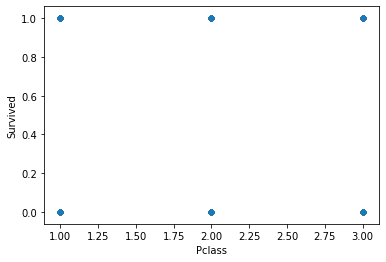

In [4]:
plt.figure(figsize=(10,10))
train.plot.scatter(x="Pclass", y= "Survived")

<Figure size 864x432 with 0 Axes>

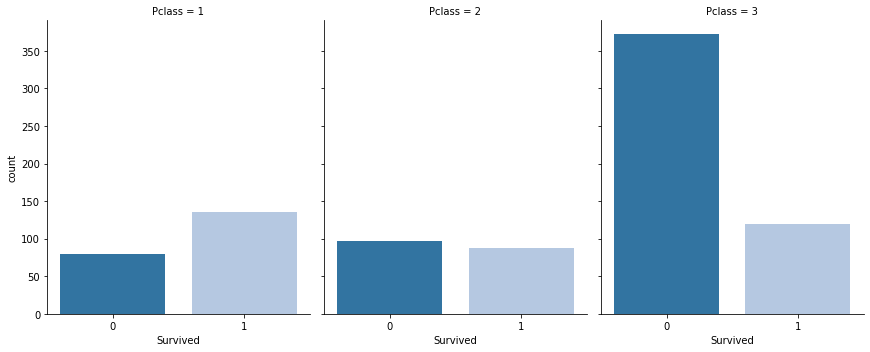

In [5]:
import seaborn as sns
fig = plt.figure(figsize = (12, 6))
ax = sns.catplot("Survived", 
                 col = "Pclass", 
                 data = train, 
                 kind = "count",  
                 palette = 'tab20',  
                 aspect = .8
                );

<Figure size 864x432 with 0 Axes>

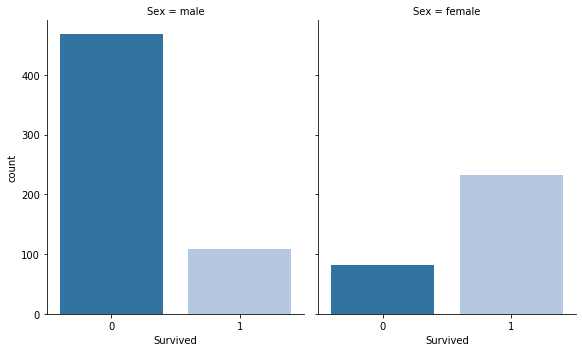

In [6]:
import seaborn as sns
fig = plt.figure(figsize = (12, 6))
ax = sns.catplot("Survived", 
                 col = "Sex", 
                 data = train, 
                 kind = "count",  
                 palette = 'tab20',  
                 aspect = .8
                );

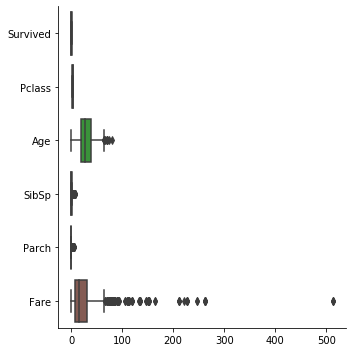

In [7]:
sns.catplot(data=train, orient="h" , kind="box");

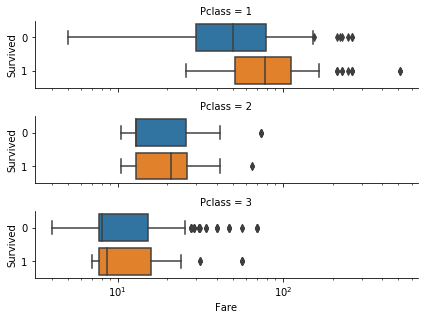

In [8]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient='h', height=1.5, aspect=4,
                data=train.query("Fare > 0"))
g.set(xscale="log");

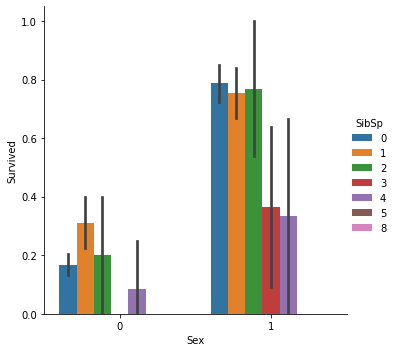

In [218]:
sns.catplot(x="Sex", y="Survived", hue="SibSp", kind="bar", data=train);

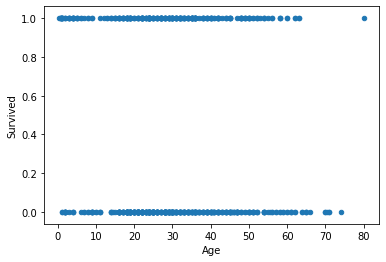

In [10]:
train.plot.scatter(x= "Age", y="Survived")

<Figure size 864x432 with 0 Axes>

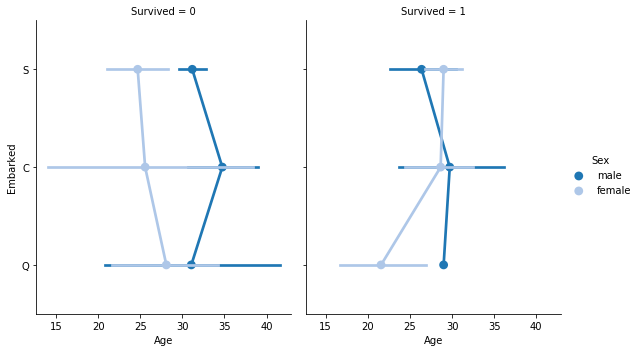

In [11]:
fig = plt.figure(figsize = (12, 6))
ax = sns.catplot(x = "Age",
                 y = "Embarked",
                 col = "Survived",
                 hue = "Sex",
                 data = train, 
                 kind = "point",  
                 palette = 'tab20',  
                 aspect = .8
                );

In [12]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train["Age"].isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [14]:
np.mean(train["Age"])

29.69911764705882

In [15]:
train["Age"].isnull().sum(axis = 0)

177

In [16]:
train["Age"].replace(np.nan, np.mean(train["Age"]))

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

In [17]:
train["Age"].isnull().sum(axis = 0)

177

In [18]:
train["Age"].isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [19]:
train["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
train["Age"]=train["Age"].replace(np.nan, np.mean(train["Age"]))

In [21]:
train["Age"].isnull().sum(axis = 0)

0

In [22]:
train.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
train.groupby("Embarked")["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [24]:
train["Embarked"]=train["Embarked"].replace(np.nan,"S")

In [25]:
train.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [26]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train["Sex"]= train["Sex"].map({"male":0, "female":1})
train["Embarked"]= train["Embarked"].map({"S":0, "C":1, "Q":2})
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [28]:
train.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [29]:
features=[ "Pclass", "Sex", "Age", "SibSp", "Embarked"]
X= train[features]
y= train["Survived"]

In [30]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred= rfc.predict(X_test)


In [42]:
from sklearn.metrics import  confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8044692737430168
[[95 15]
 [20 49]]


In [58]:
test= pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
test["Sex"]= test["Sex"].map({"male":0, "female":1})
test["Embarked"]= test["Embarked"].map({"S":0, "C":1, "Q":2})
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [64]:
test.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
test["Age"]=test["Age"].replace(np.nan, np.mean(train["Age"]))

In [66]:
test.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [67]:
pred= rfc.predict(test[features])
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [69]:
len(pred)

418

In [70]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})
output.to_csv('my_submission.csv', index=False)

In [71]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [72]:
output.shape

(418, 2)

In [291]:
train2= pd.read_csv("train.csv")
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [292]:
train2.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [293]:
p=pd.get_dummies(train2["Pclass"], prefix='Pclass')
p.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [294]:
train2.set_index("PassengerId", inplace= True)
train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
E=pd.get_dummies(train2["Embarked"], prefix='Embarked')
E.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [296]:
train2 = pd.concat([train2, p, E], axis=1)
train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN
1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0,0.0,1.0


In [297]:
train2.drop(["Pclass", "Embarked"], axis=1, inplace= True)

In [298]:
train2.drop([0], axis=0, inplace= True)

In [299]:
train2.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,0.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0


In [300]:
train2["Age"]= train2["Age"].replace(np.nan, np.mean(train2["Age"]))

In [301]:
train2["Age"]= (train2["Age"]-np.mean(train2["Age"]))/(train2["Age"].max()-train2["Age"].min())

In [302]:
train2["Age"].head()

1   -0.096747
2    0.104309
3   -0.046483
4    0.066611
5    0.066611
Name: Age, dtype: float64

In [303]:
train2.head(20)

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,0.0,"Braund, Mr. Owen Harris",male,-9.674689e-02,1.0,0.0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.043086e-01,1.0,0.0,PC 17599,71.2833,C85,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,"Heikkinen, Miss. Laina",female,-4.648301e-02,0.0,0.0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,6.661074e-02,1.0,0.0,113803,53.1000,C123,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,"Allen, Mr. William Henry",male,6.661074e-02,0.0,0.0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,"Moran, Mr. James",male,7.142928e-16,0.0,0.0,330877,8.4583,NaN,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,"McCarthy, Mr. Timothy J",male,3.053642e-01,0.0,0.0,17463,51.8625,E46,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,"Palsson, Master. Gosta Leonard",male,-3.480663e-01,3.0,1.0,349909,21.0750,NaN,0.0,0.0,1.0,0.0,0.0,1.0
9,1.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-3.391704e-02,0.0,2.0,347742,11.1333,NaN,0.0,1.0,0.0,0.0,0.0,1.0
10,1.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.972747e-01,1.0,0.0,237736,30.0708,NaN,0.0,0.0,1.0,1.0,0.0,0.0


In [304]:
train2["Sex"]= train2["Sex"].map({"male":0, "female":1})

In [305]:
train2.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,0.0,"Braund, Mr. Owen Harris",0,-0.096747,1.0,0.0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.104309,1.0,0.0,PC 17599,71.2833,C85,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,"Heikkinen, Miss. Laina",1,-0.046483,0.0,0.0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.066611,1.0,0.0,113803,53.1000,C123,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,"Allen, Mr. William Henry",0,0.066611,0.0,0.0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0


In [306]:
import category_encoders as ce

In [307]:
train2.dtypes

Survived      float64
Name           object
Sex             int64
Age           float64
SibSp         float64
Parch         float64
Ticket         object
Fare          float64
Cabin          object
Pclass_1      float64
Pclass_2      float64
Pclass_3      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [308]:
enc = ce.BinaryEncoder(cols=["SibSp"]).fit(train2)
train2 = enc.transform(train2)

In [309]:
train2.head(20)

,Survived,Name,Sex,Age,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,0.0,"Braund, Mr. Owen Harris",0,-9.674689e-02,0,0,0,1,0.0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.043086e-01,0,0,0,1,0.0,PC 17599,71.2833,C85,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,"Heikkinen, Miss. Laina",1,-4.648301e-02,0,0,1,0,0.0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6.661074e-02,0,0,0,1,0.0,113803,53.1000,C123,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,"Allen, Mr. William Henry",0,6.661074e-02,0,0,1,0,0.0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,"Moran, Mr. James",0,7.142928e-16,0,0,1,0,0.0,330877,8.4583,NaN,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,"McCarthy, Mr. Timothy J",0,3.053642e-01,0,0,1,0,0.0,17463,51.8625,E46,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,"Palsson, Master. Gosta Leonard",0,-3.480663e-01,0,0,1,1,1.0,349909,21.0750,NaN,0.0,0.0,1.0,0.0,0.0,1.0
9,1.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,-3.391704e-02,0,0,1,0,2.0,347742,11.1333,NaN,0.0,1.0,0.0,0.0,0.0,1.0
10,1.0,"Nasser, Mrs. Nicholas (Adele Achem)",1,-1.972747e-01,0,0,0,1,0.0,237736,30.0708,NaN,0.0,0.0,1.0,1.0,0.0,0.0


In [310]:
train2.drop(["Name","Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [311]:
train2.tail()
train2.drop([891], axis=0, inplace=True)

In [312]:
train2.tail()

,Survived,Sex,Age,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
886,0.0,1,1.168746e-01,0,0,1,0,5.0,0.0,1.0,0.0,0.0,1.0,0.0
887,0.0,0,-3.391704e-02,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,1.0,1,-1.344448e-01,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,0.0,1,7.142928e-16,0,0,0,1,2.0,1.0,0.0,0.0,0.0,0.0,1.0
890,1.0,0,-4.648301e-02,0,0,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [313]:
train2.isnull().sum(axis=0)

Survived      0
Sex           0
Age           0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
Parch         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [314]:
X= train2.iloc[:,1:]

In [315]:
X.head()

,Sex,Age,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
1,0,-0.096747,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0.104309,0,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,-0.046483,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.066611,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0,0.066611,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [316]:
y= train2["Survived"]
y.head()

1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

In [317]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [318]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [319]:
y_pred= rfc.predict(X_test)

In [320]:
from sklearn.metrics import  confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7808988764044944
[[90 22]
 [17 49]]


In [321]:
from sklearn import svm
sup= svm.SVC()
sup.fit(X_train, y_train)
y_pred= sup.predict(X_test)
from sklearn.metrics import  confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7752808988764045
[[90 22]
 [18 48]]


C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [326]:
X1=  train2.iloc[:,[1, 2, 7, 8,9,10]]

In [327]:
X1.head()

,Sex,Age,Parch,Pclass_1,Pclass_2,Pclass_3
1,0,-0.096747,0.0,1.0,0.0,0.0
2,1,0.104309,0.0,0.0,0.0,1.0
3,1,-0.046483,0.0,1.0,0.0,0.0
4,1,0.066611,0.0,0.0,0.0,1.0
5,0,0.066611,0.0,0.0,0.0,1.0


In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)
from sklearn.metrics import  confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7752808988764045
[[91 21]
 [19 47]]
